In [71]:
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import rdkit.Chem.EState as Estate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# use HCEPD_100 as example
data = pd.read_csv(r'C:\Users\alex0\Documents\Python\Project\Repository\PV-Cell\PV-Cell\Data\HCEPD_100K.csv') # Try using 100K for practice

In [50]:
data1000 = data.head(1000)

In [51]:
# fingerprinter [0] returns an array
train_data = pd.DataFrame({'SMILES_str':data1000['SMILES_str'], 'pce':data1000['pce']})
descriptors = []
for i in range(len(data1000['SMILES_str'])):
    m = Chem.MolFromSmiles(data1000['SMILES_str'].values[i])
    descriptors.append(Fingerprinter.FingerprintMol(m1)[0])
# descriptors is a list of input feature (x)

In [52]:
# define a training dataset
X = np.array(descriptors)
y = train_data['pce'].values
st = StandardScaler()
X= st.fit_transform(X)

c:\users\alex0\anaconda3\envs\pvc-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\alex0\anaconda3\envs\pvc-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
#build up ml model
model = Sequential()
#First layer is input (descriptors)
model.add(Dense(output_dim=10, input_dim=X.shape[1])) #input shape(number of descriptors) and output shape(10 neurons)
# Activation model use sigmoid for first layer
model.add(Activation("sigmoid"))
# Second layer (output layer)
model.add(Dense(output_dim=1))
model.add(Activation("linear"))

# Visualize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                800       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


c:\users\alex0\anaconda3\envs\pvc-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=79, units=10)`
  after removing the cwd from sys.path.
c:\users\alex0\anaconda3\envs\pvc-env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [54]:
# Start Learning Process
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
history = model.fit(X, y, nb_epoch=100, batch_size=10)
y_pred = model.predict(X)
rms = (np.mean((y.reshape(-1,1) - y_pred)**2))**0.5
#s = np.std(y_test -y_pred)
print ("Neural Network RMS", rms)

c:\users\alex0\anaconda3\envs\pvc-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
1000/1000 [==============================] - 0s 215us/step - loss: 4.2994
Epoch 2/100
1000/1000 [==============================] - 0s 78us/step - loss: 3.8543
Epoch 3/100
1000/1000 [==============================] - 0s 82us/step - loss: 3.8601
Epoch 4/100
1000/1000 [==============================] - 0s 81us/step - loss: 3.8932
Epoch 5/100
1000/1000 [==============================] - 0s 83us/step - loss: 3.8491
Epoch 6/100
1000/1000 [==============================] - 0s 81us/step - loss: 3.8465
Epoch 7/100
1000/1000 [==============================] - 0s 82us/step - loss: 3.8835
Epoch 8/100
1000/1000 [==============================] - 0s 81us/step - loss: 3.8109
Epoch 9/100
1000/1000 [==============================] - 0s 84us/step - loss: 3.8439
Epoch 10/100
1000/1000 [==============================] - 0s 83us/step - loss: 3.8445
Epoch 11/100
1000/1000 [==============================] - 0s 85us/step - loss: 3.8654
Epoch 12/100
1000/1000 [==============================] - 0s 8

1000/1000 [==============================] - 0s 76us/step - loss: 3.8047
Epoch 97/100
1000/1000 [==============================] - 0s 78us/step - loss: 3.7980
Epoch 98/100
1000/1000 [==============================] - 0s 77us/step - loss: 3.7825
Epoch 99/100
1000/1000 [==============================] - 0s 91us/step - loss: 3.8093
Epoch 100/100
1000/1000 [==============================] - 0s 98us/step - loss: 3.8079
Neural Network RMS 1.9418164854460822


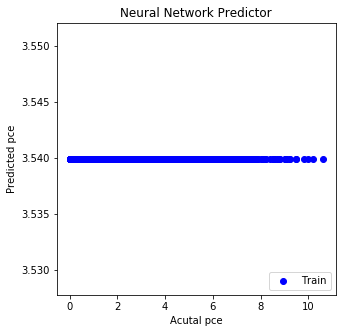

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.scatter(y,model.predict(X), label = 'Train', c='blue')
plt.title('Neural Network Predictor')
plt.xlabel('Acutal pce')
plt.ylabel('Predicted pce')
plt.legend(loc=4)
plt.show()

In [ ]:
rdFMCS.FindMCS(mols).numAtoms

In [62]:
import rdkit.Chem.rdchem as rdchem

In [80]:
m2 = Chem.MolFromSmiles(data1000['SMILES_str'][0])
mm = [('sLi', '[LiD1]-*')]
Estate.AtomTypes.TypeAtoms(m2)

[('ssCH2',),
 ('dsCH',),
 ('dsCH',),
 ('dsCH',),
 ('dssC',),
 ('aasC',),
 ('aaCH',),
 ('aaaC',),
 ('aaSe',),
 ('aaaC',),
 ('aaaC',),
 ('aaO',),
 ('aaCH',),
 ('aaCH',),
 ('aaaC',),
 ('aaaC',),
 ('aaN',),
 ('aaS',),
 ('aaN',),
 ('aaaC',),
 ('aaaC',),
 ('aaaC',),
 ('aaCH',),
 ('aaN',)]

Build up model on numbers of heteroatoms

In [58]:
from rdkit.Chem import rdFMCS
m2 = data1000['SMILES_str'][0]
rdFMCS.FindMCS(m2).numAtoms

TypeError: No registered converter was able to produce a C++ rvalue of type class boost::shared_ptr<class RDKit::ROMol> from this Python object of type str

In [96]:
from rdkit.Chem.AtomPairs import Pairs
# create a list of 'SMILES_str'
smile_list = []
for i in data1000['SMILES_str']:
    smile_list.append(Chem.MolFromSmiles(i))
pairFps = [Pairs.GetAtomPairFingerprint(x) for x in smile_list]

In [102]:
len(pairFps)

1000

In [106]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(pairFps[0],pairFps[30])

0.654434250764526